In [43]:
%matplotlib notebook

In [44]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [45]:
Q1 = pd.read_csv('RejectStats_2017Q1.csv', skiprows=1)
Q2 = pd.read_csv('RejectStats_2017Q2.csv', skiprows=1)
Q3 = pd.read_csv('RejectStats_2017Q3.csv', skiprows=1)
Q4 = pd.read_csv('RejectStats_2017Q4.csv', skiprows=1)

In [46]:
loan17 = Q1.append([Q2,Q3,Q4])

In [47]:
#Delete unused columns
loan17 = loan17.drop(['Risk_Score', 'Policy Code', 'Zip Code'], axis=1)

In [48]:
#Change Loan Title categories so they're standardized
loan17['Loan Title'] = loan17['Loan Title'].str.replace('Business Loan', 'Business')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('home_improvement', 'Home improvement')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('car', 'Car financing')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('credit_card', 'Credit card refinancing')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('debt_consolidation', 'Debt consolidation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('house', 'Home buying')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('medical', 'Medical expenses')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('moving', 'Moving and relocation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('major_purchase', 'Major purchase')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('vacation', 'Vacation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('renewable_energy', 'Renewable energy')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('small_business', 'Small business')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('other', 'Other')

In [49]:
#Optional: Change column names with _
loan17 = loan17.rename(columns = {'Amount Requested': 'Amount_Requested', 
                          'Application Date': 'Application_Date', 
                          'Loan Title':'Loan_Title', 
                          'Debt-To-Income Ratio':'Debt_to_Income_Ratio', 
                          'Employment Length':'Employment_Length'})

In [50]:
#Total number of rejected applications by state
State_Total_Rej = loan17.groupby('State').Application_Date.count()
State_Total_Rej.head()

# Set the index to be "State" so they will be used as labels
#State_Total_Rej = State_Total_Rej.set_index("Total Applications")

State
AK     15238
AL    128912
AR     73922
AZ    153543
CA    832267
Name: Application_Date, dtype: int64

In [51]:
#make graph here
#make graph here
# Set x axis and tick locations
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

#x_axis = np.arange(0, len(State_Total_Rej))
#tick_locations = [value for value in x_axis]


# Set x and y limits
#plt.xlim(len(x_axis))
#plt.ylim(0, max(State_Total_Raj["Count"])+10)


# Set a Title and labels
#plt.title("Total Applications Per State")
#plt.xlabel("State")
#plt.ylabel("Total Applications")

In [60]:
#Total in amount requested by state
State_Loan_Amount = loan17.groupby('State').sum()
State_Loan_Amount.head()

#change format to dollars
#State_Loan_Amount["Amount_Requested"] = State_Loan_Amount["Amount_Requested"].map("${:.0f}".format)
#State_Loan_Amount

#State_Loan_Amount["Amount_Requested"] = State_Loan_Amount["Amount_Requested"].map(:.0f".format)

,Amount_Requested
State,
AK,2.242872e+08
AL,1.466277e+09
AR,9.259108e+08
AZ,1.940151e+09
CA,1.134731e+10


<IPython.core.display.Javascript object>


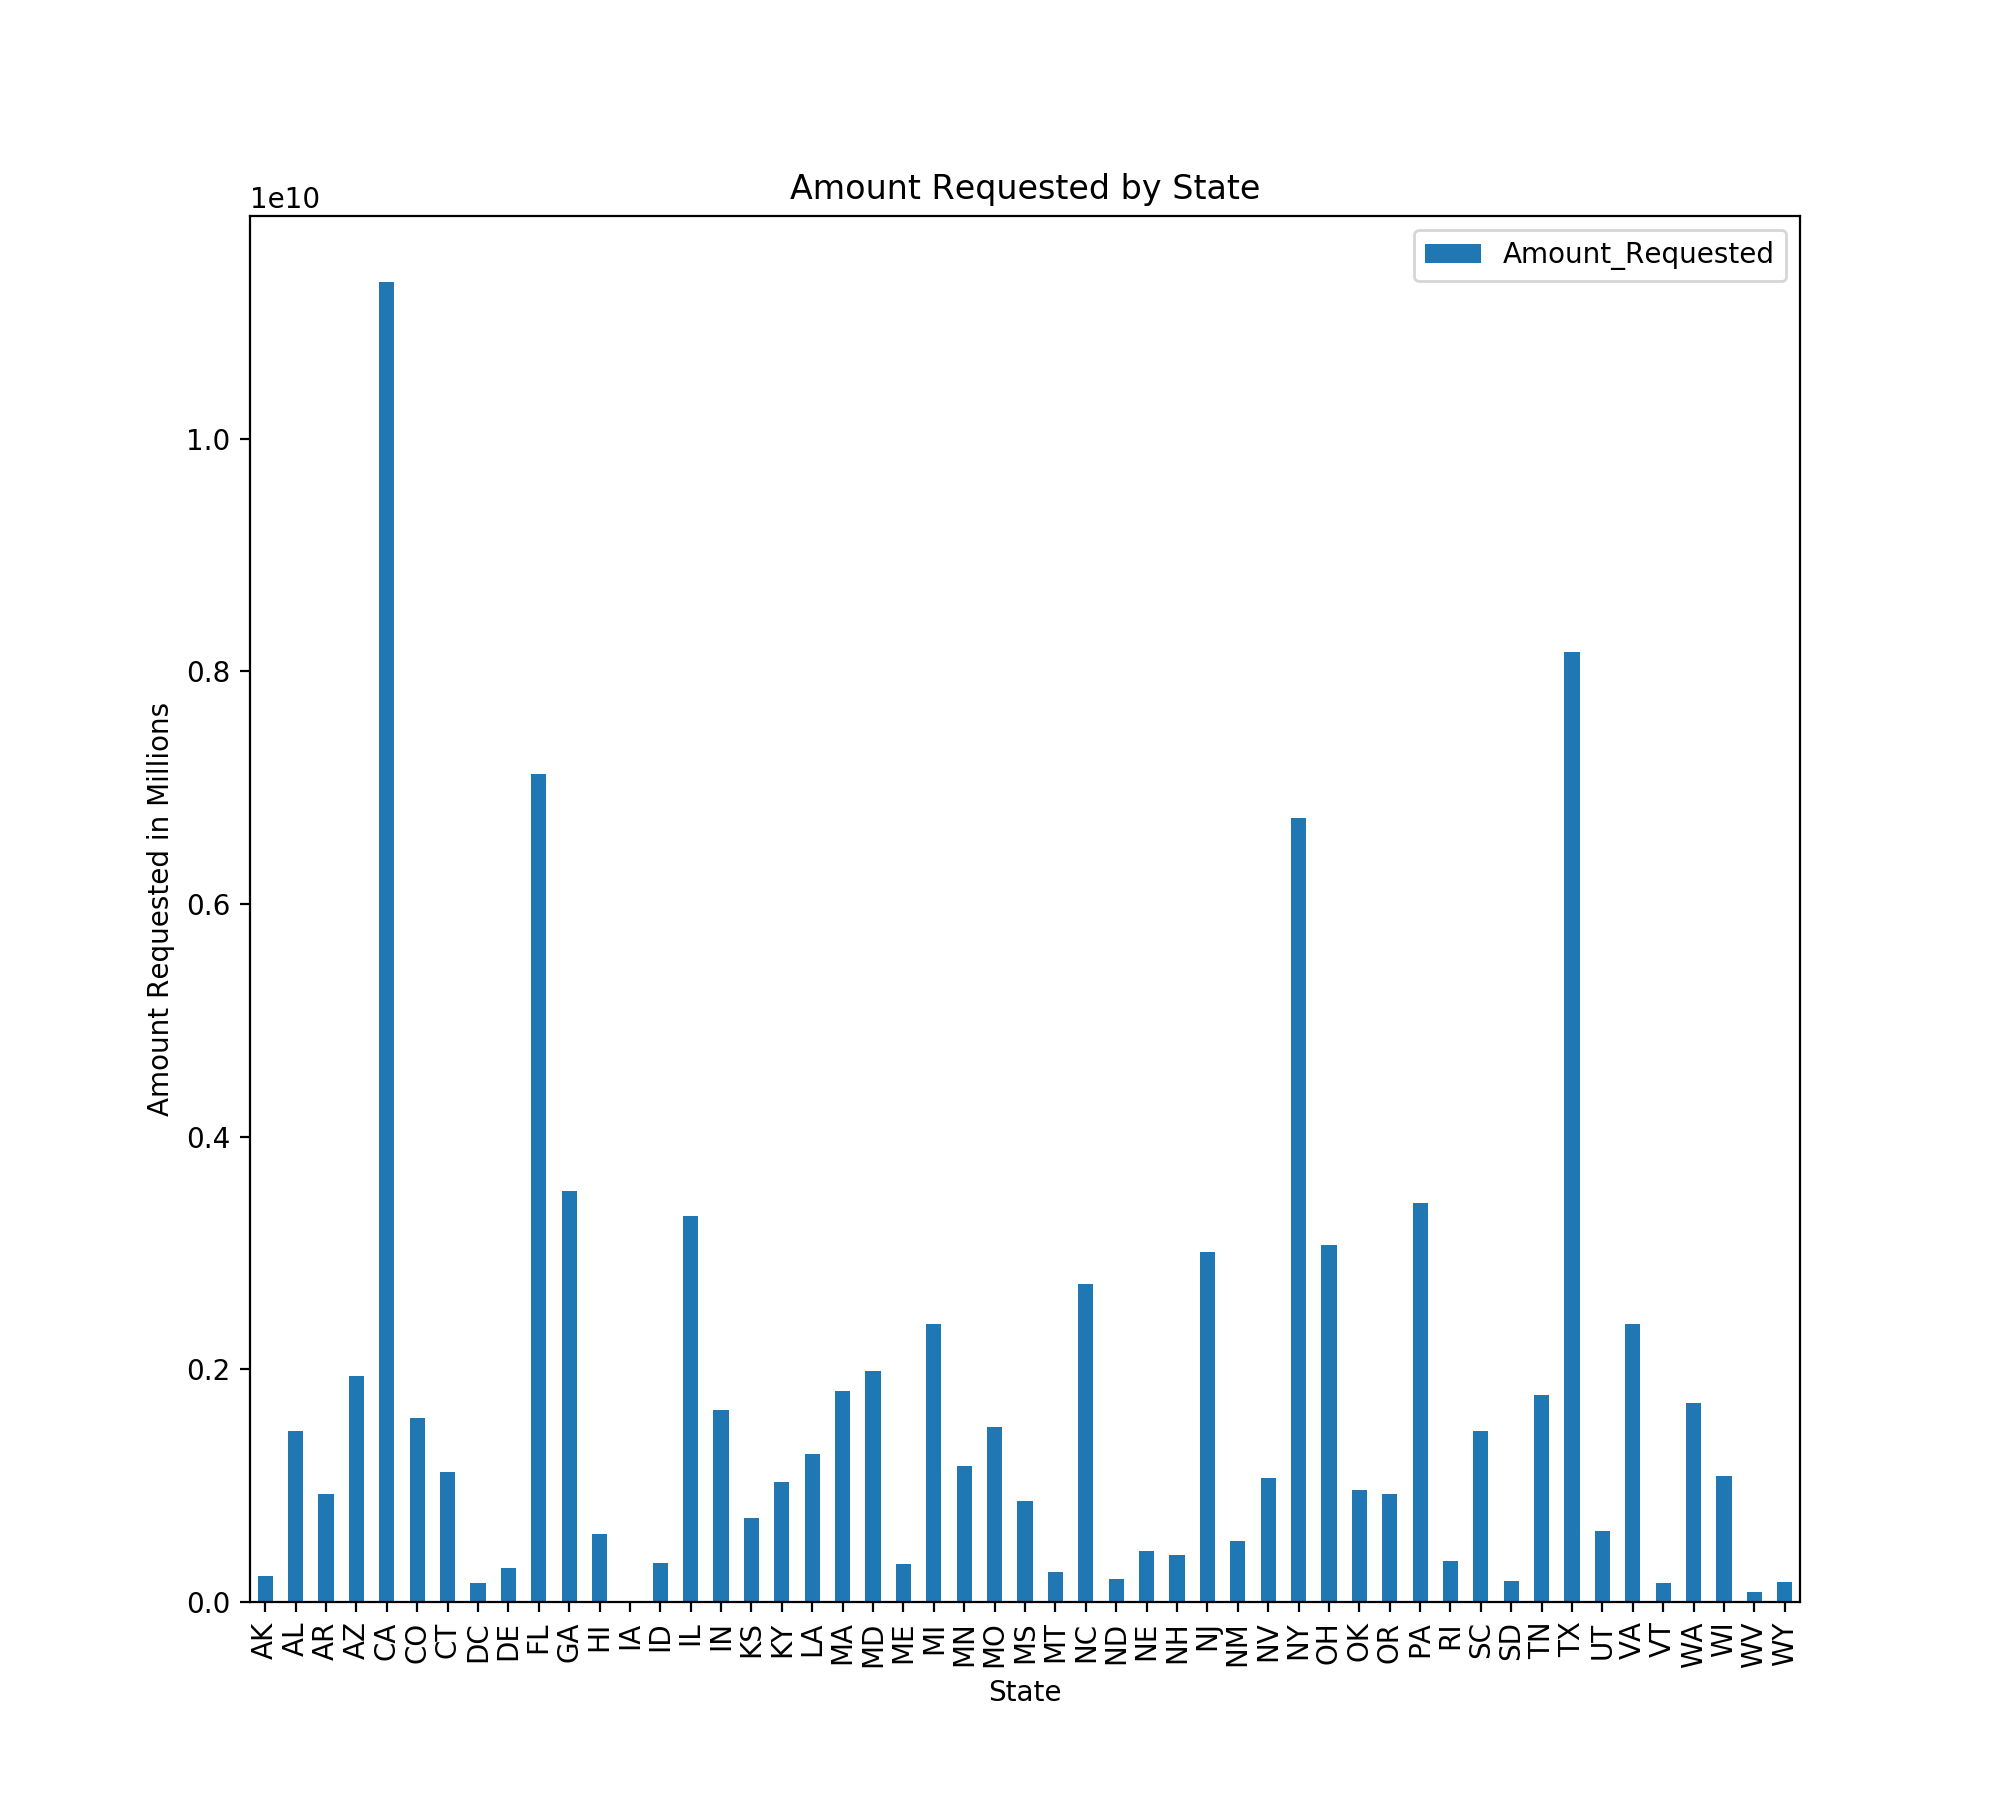

In [61]:
x_axis = np.arange(len(State_Loan_Amount))

barplot = State_Loan_Amount.plot(kind='bar', figsize=(10,9), title='Amount Requested by State')

plt.ylabel('Amount Requested in Millions')

plt.xlabel('State')

plt.savefig('Amount_Requested_by_State.png')

In [57]:
#Total loan applications by type
Loan_Types = loan17.groupby('Loan_Title').Loan_Title.count()

Loan_Title
Business                     41233
Car financing               125620
Credit card refinancing     446162
Debt consolidation         1060912
Green loan                    2850
Home buying                 112649
Home improvement             67463
Major purchase              100902
Medical expenses             61772
Moving and relocation        44759
Other                       500368
Vacation                     20555
Name: Loan_Title, dtype: int64

In [55]:
#Overview of loan applications by type per state
Loan_Types_Per_State = Q3.groupby('Loan_Title').State.value_counts()

Loan_Title  State
Business    CA       6012
            FL       4374
            TX       4087
            NY       3031
            GA       2116
            IL       1318
            NJ       1270
            NC       1124
            PA       1121
            OH       1077
            VA        944
            MI        917
            MD        912
            AZ        870
            CO        717
            TN        715
            MA        680
            LA        671
            IN        631
            MO        628
            WA        628
            AL        620
            SC        593
            NV        574
            MN        454
            CT        443
            MS        429
            OR        422
            WI        402
            AR        371
                     ... 
Vacation    MO        330
            KY        297
            HI        291
            IN        290
            MS        273
            NV        266
            CT      

In [54]:
#Overview of loan application types by state
Loan_By_State = Q3.groupby('State').Loan_Title.value_counts()

State  Loan_Title             
AK     Debt consolidation          1892
       Other                        970
       Credit card refinancing      884
       Major purchase               272
       Home buying                  173
       Car financing                156
       Medical expenses             108
       Home improvement             100
       Business                      97
       Moving and relocation         88
       Vacation                      63
       Green loan                     9
AL     Debt consolidation         17724
       Other                       8764
       Credit card refinancing     5678
       Car financing               2378
       Home buying                 2283
       Major purchase              1690
       Home improvement            1397
       Medical expenses            1145
       Moving and relocation        716
       Business                     620
       Vacation                     345
       Green loan                    49
AR     De

In [118]:
D2I = Q3['Debt_to_Income_Ratio'].str.replace('%', '')
D2I = pd.to_numeric(D2I)

0            100.00
1              7.45
2             34.93
3             27.87
4             -1.00
5             36.68
6             19.93
7             18.45
8            619.44
9             30.90
10            12.43
11             3.31
12             2.34
13           100.00
14            28.00
15            13.83
16            38.55
17             7.37
18            14.92
19            22.62
20             0.00
21           100.00
22             8.48
23            11.37
24             6.67
25            11.74
26           100.00
27             3.99
28            50.53
29           100.00
             ...   
2585215       22.03
2585216       27.12
2585217       21.13
2585218        7.68
2585219       38.90
2585220       23.31
2585221        3.42
2585222       41.39
2585223      100.00
2585224        0.00
2585225       75.09
2585226      100.00
2585227      419.40
2585228       53.00
2585229       15.85
2585230       23.99
2585231        2.51
2585232       19.40
2585233    10025.33


In [119]:
Bins = [0, 25, 50, 75, 100]
Group_Names = ["0 to 25%", "25 to 50%", "50 to 75%", "75 to 100%"]

In [138]:
Q3["Ratio_Summary"] = pd.cut(D2I, Bins, labels=Group_Names)
Q3.groupby('Employment_Length').Ratio_Summary.count()

Employment_Length
1 year         25176
10+ years      33181
2 years        19911
3 years        18067
4 years        11726
5 years        24289
6 years         5995
7 years         4110
8 years         6924
9 years         5690
< 1 year     2155816
Name: Ratio_Summary, dtype: int64

In [128]:
Ratio_Summary = Q3.groupby('Ratio_Summary').Ratio_Summary.count()
#The lower the better
Ratio_Summary

Ratio_Summary
0 to 25%      1334300
25 to 50%      661866
50 to 75%      130824
75 to 100%     278737
Name: Ratio_Summary, dtype: int64

In [61]:
EL = Q3.groupby('Employment_Length').Employment_Length.unique()

In [62]:
EL

Employment_Length
1 year          [1 year]
10+ years    [10+ years]
2 years        [2 years]
3 years        [3 years]
4 years        [4 years]
5 years        [5 years]
6 years        [6 years]
7 years        [7 years]
8 years        [8 years]
9 years        [9 years]
< 1 year      [< 1 year]
Name: Employment_Length, dtype: object

In [9]:
Q3.to_excel('/Users/teresalee/Desktop/test.xlsx')